<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Sep29-30/Sep29_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MONTECARLO


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

data1 = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T
x = np.array(data1[0])
y = np.array(data1[1])



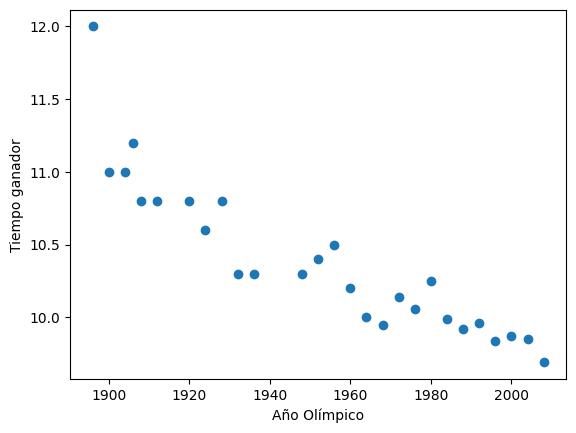

In [ ]:
plt.scatter(x, y)
plt.xlabel("Año Olímpico")
plt.ylabel("Tiempo ganador")
plt.show()

Investigando scypy.stats.nornm:
$$f(x) = \frac{exp(\frac{-x^{2}}{2})}{\sqrt{2\pi}}$$

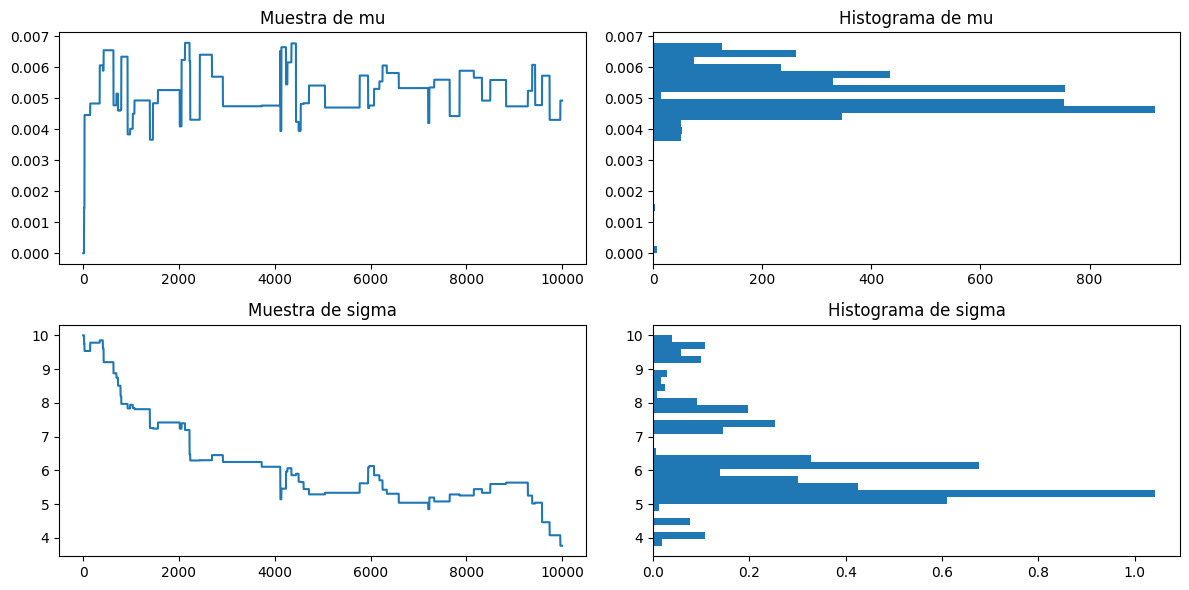

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm # Para sacar mu


# Función de log-likelihood (logaritmo del likelihood)
def log_likelihood(x, y, params):
  # Investigando, se le llama al primer parámetro mu y al segundo sigma.
    mu, sigma = params

    y_pred = mu * x # Calcula las predicciones del modelo

    # Cuando se pone norm.pdf(x, loc=0, scale=1)
    # Regresa: Densidad de probabilidad de (en este caso), y_pred y sigma con respecto a y
    log_likelihood_values = norm.logpdf(y, loc=y_pred, scale=sigma)
    return np.sum(log_likelihood_values)

# Función de log-prior (logaritmo del prior)
def log_prior(x, y, params):
    mu, sigma = params
    # Investigué y se pone por estandar 0 y 10:
    if 0 <= mu <= 10 and 0 <= sigma <= 10:
        return 0.0      # Priors uniformes
    else:
        return -np.inf  # Logaritmo de probabilidad 0

# Función para calcular el logaritmo del posterior
def log_posterior(x, y, params):
    return log_likelihood(x, y, params) + log_prior(x, y, params)

# Algoritmo de Metrópolis MCMC visto en clase:
def metropolis_mcmc(initial_params, num_samples, proposal_std):
    # Hacemos el arreglo donde irá nuestra distribución:
    samples = [initial_params]
    # Variable donde se guardarán los aceptados.
    current_params = initial_params

    for _ in range(num_samples):
        # Propuesta de un nuevo conjunto de parámetros
        # random.normal returns: ndarray or scalar
        # Drawn samples from the parameterized normal distribution.
        proposal = np.random.normal(current_params, proposal_std)

        # Aceptación o rechazo de la propuesta
        log_acceptance_ratio = log_posterior(x, y, proposal) - log_posterior(x, y, current_params)
        if np.log(np.random.rand()) < log_acceptance_ratio:
            current_params = proposal

        # Si es aceptado se añade a "samples"
        samples.append(current_params)

    return np.array(samples)

# Parámetros iniciales y configuración MCMC

# Valores iniciales de mu y sigma
initial_params = [0.0, 10.0]
# Número de muestras a generar
num_samples = 10000
# W0 y W1 propuestos
proposal_std = [0.1, 0.3]

# Monte Carlo Metropolis
samples = metropolis_mcmc(initial_params, num_samples, proposal_std)

# Graficar resultados
# Vi en un video que graficaban los histogramas de manera perpendicular
# a la gráfica generada, entonce eso haré yo también:

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(samples[:, 0])
plt.title('Muestra de mu')
plt.subplot(2, 2, 2)
plt.hist(samples[:, 0], bins=30, orientation='horizontal', density=True)

plt.title('Histograma de mu')
plt.subplot(2, 2, 3)
plt.plot(samples[:, 1])
plt.title('Muestra de sigma')
plt.subplot(2, 2, 4)
plt.hist(samples[:, 1], bins=30, orientation='horizontal', density=True)
plt.title('Histograma de sigma')
plt.tight_layout()
plt.show()

Ejemplo 1
[0.0, 5.0]
[0.1, 0.3]


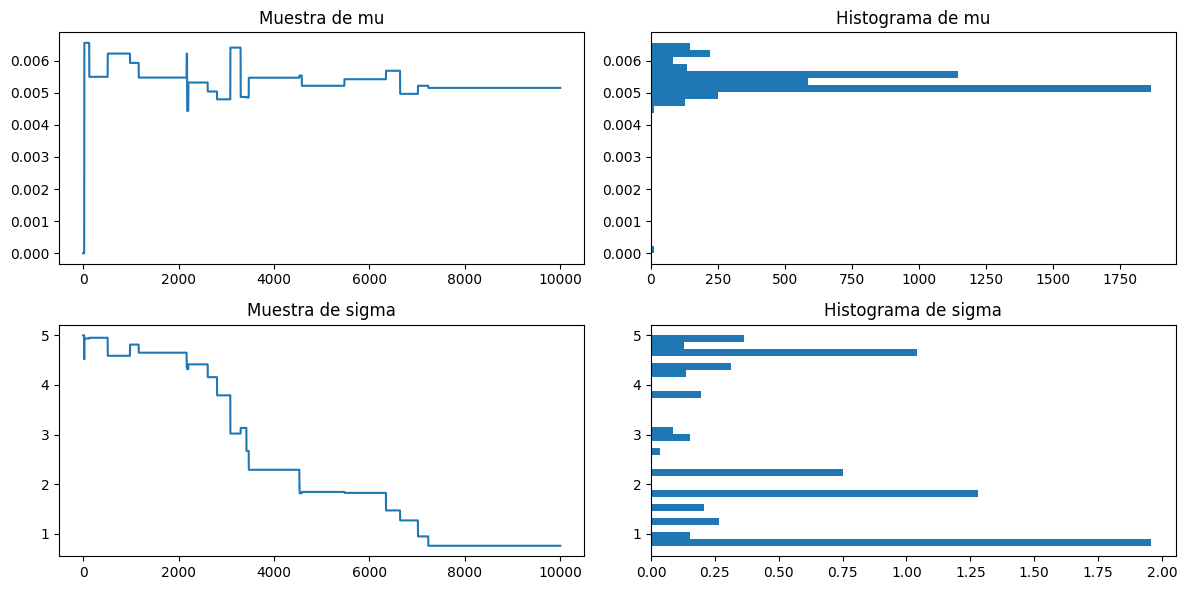

Ejemplo 2
[0.0, 4.0]
[0.5391766522071523, 0.836719202959963]


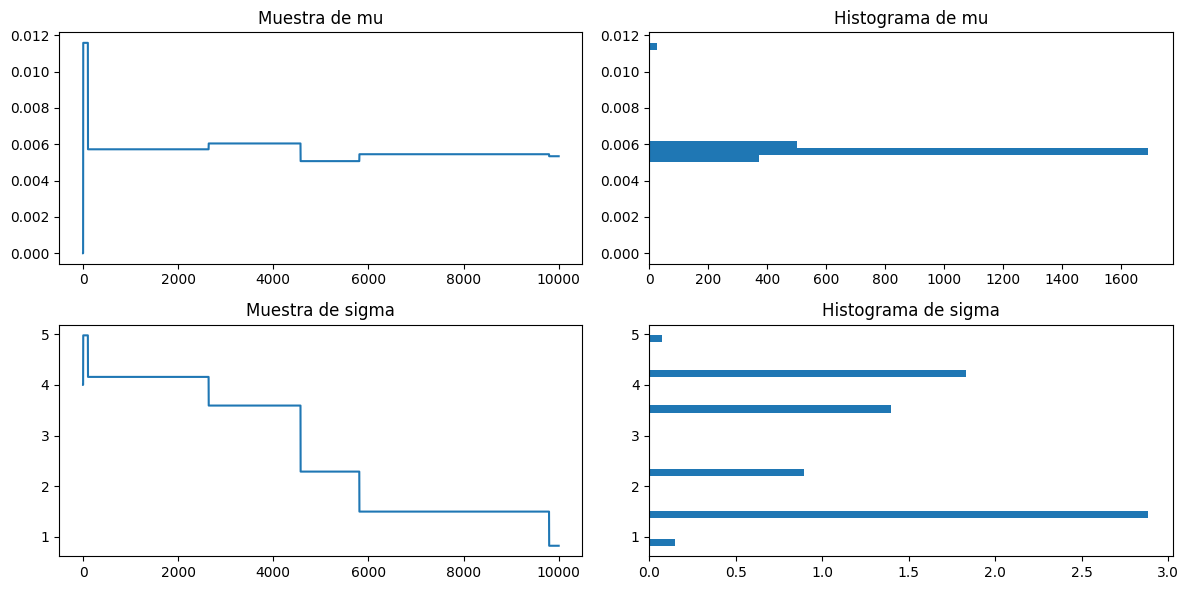

Ejemplo 3
[2.0, 4.0]
[1.7553887866426163, 2.2686879422984685]


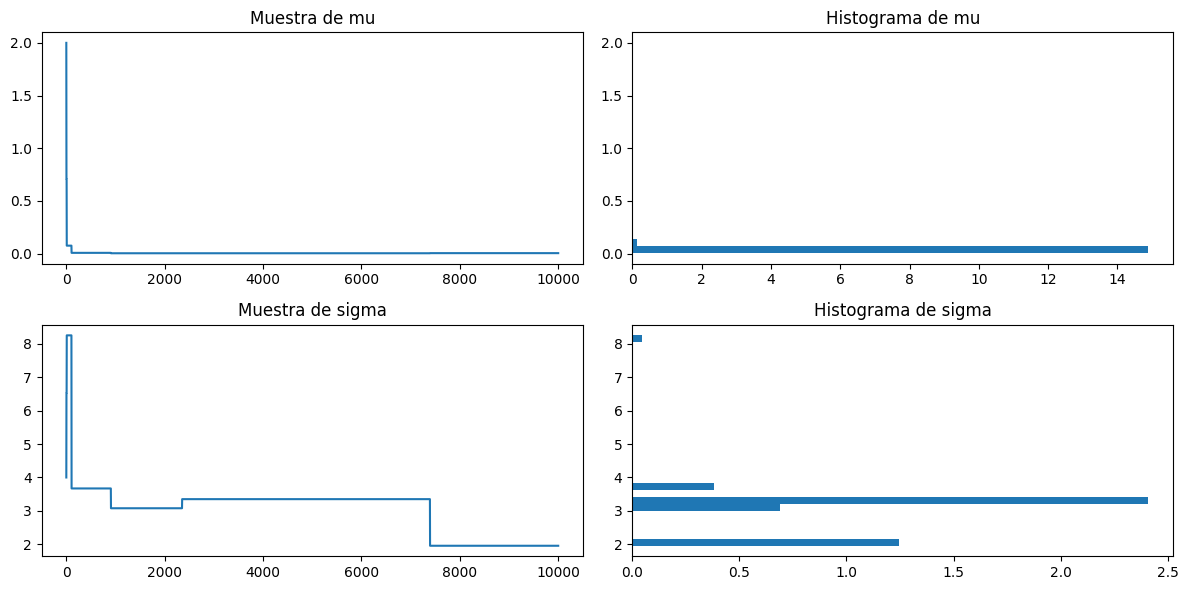

Ejemplo 4
[6.0, 6.0]
[2.998195075904094, 3.9211881039549574]


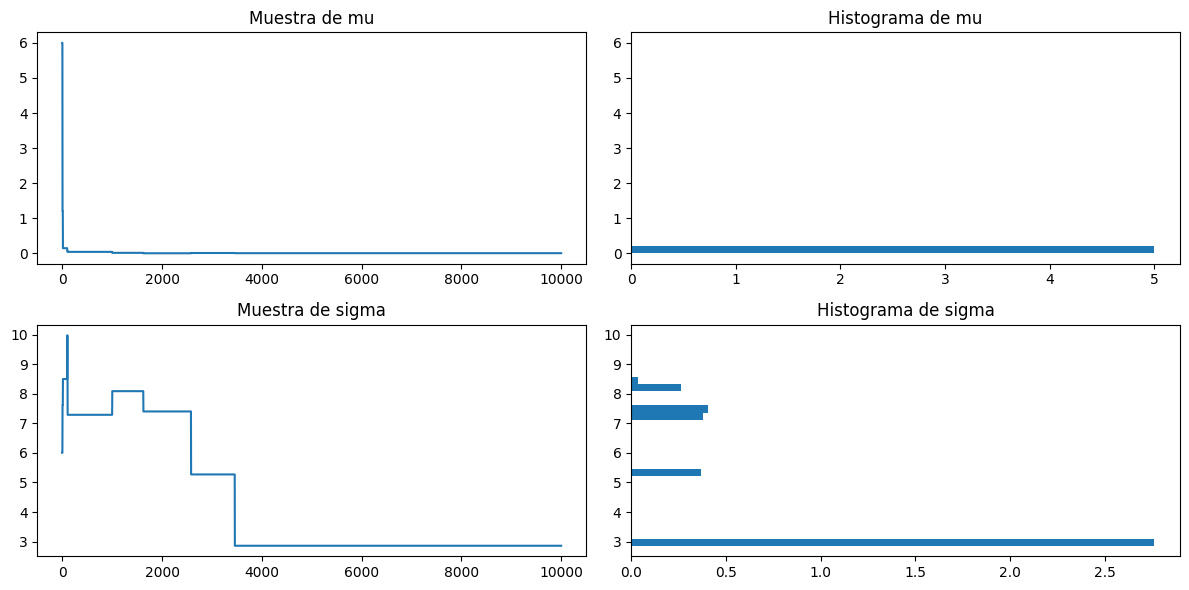

Ejemplo 5
[8.0, 7.0]
[5.176902716228093, 6.193376121586451]


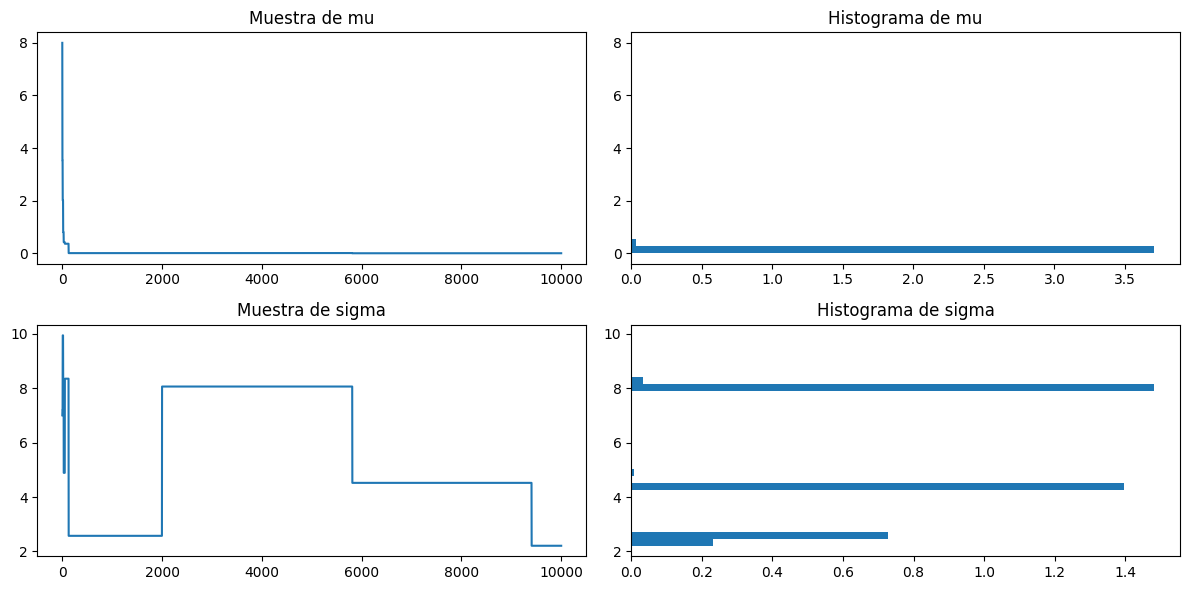

<ipython-input-25-8c9c1dfe94f3>:45: RuntimeWarning: invalid value encountered in double_scalars
  log_acceptance_ratio = log_posterior(x, y, proposal) - log_posterior(x, y, current_params)


Ejemplo 6
[11.0, 9.0]
[7.85421315270953, 9.267577766438396]


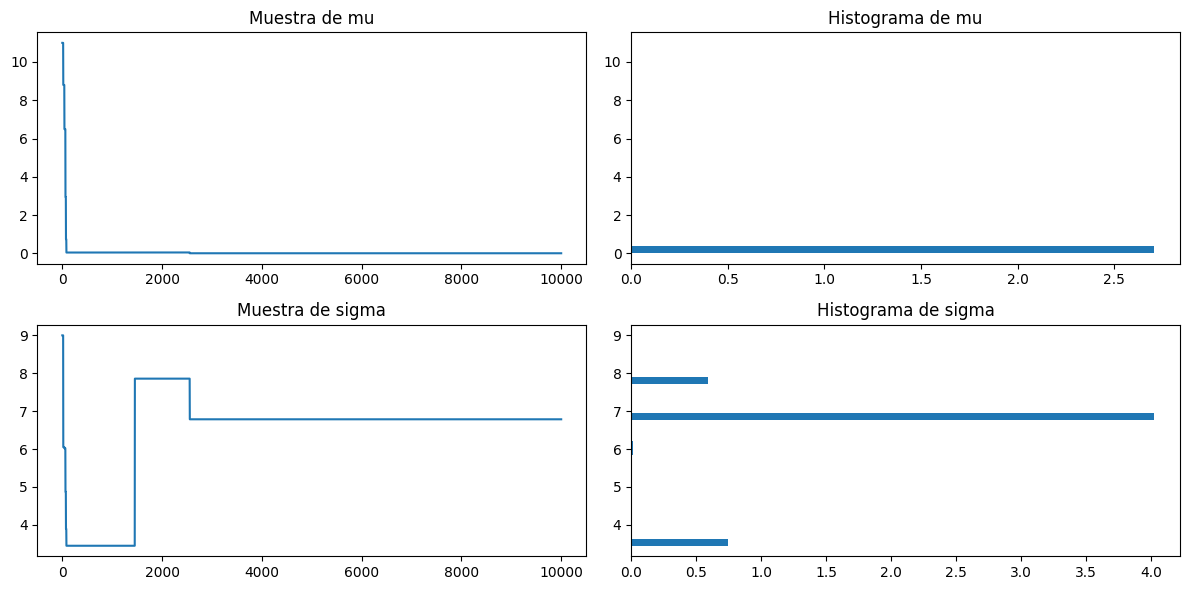

Ejemplo 7
[14.0, 11.0]
[10.722276837530842, 13.276445828839854]


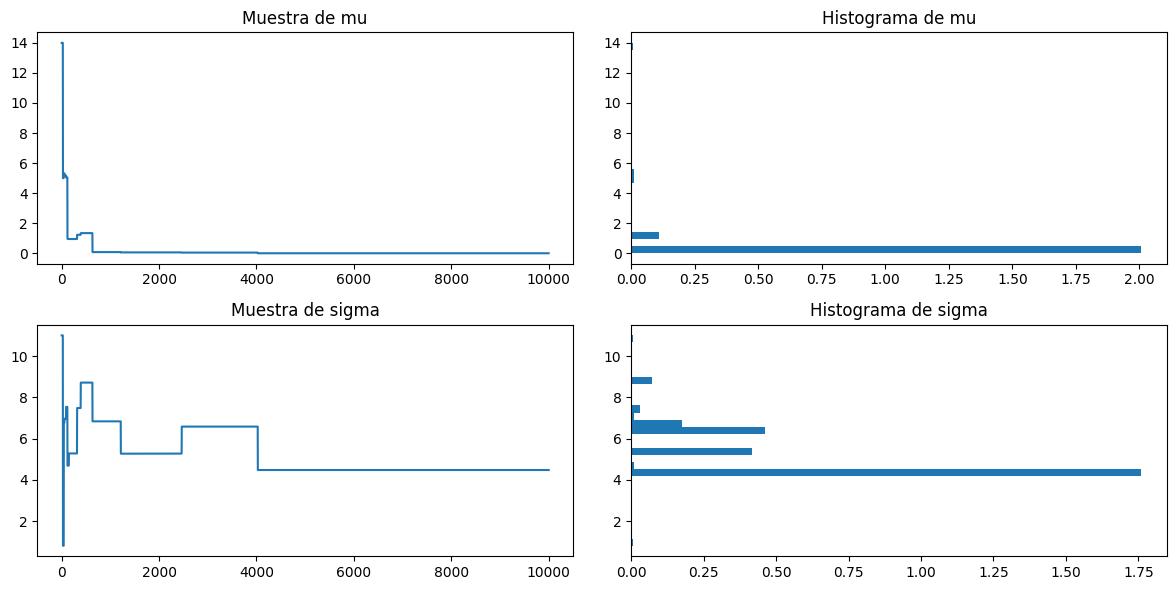

In [ ]:
import random


# Probando con distintas soluciones:


initial_params = [0.0, 5.0]
# Número de muestras a generar
num_samples = 10000
# W0 y W1 propuestos
proposal_std = [0.1, 0.3]
n = 7
a, b, c, d = 0, 0, 0, 0

for i in range(n):
  initial_params[0] += a
  initial_params[1] += b
  proposal_std[0] += c
  proposal_std[1] += d
  samples = metropolis_mcmc(initial_params, num_samples, proposal_std)

  print(f"Ejemplo {i+1}")
  print(initial_params)
  print(proposal_std)
  a += random.randint(-2, 2)
  b += random.randint(-2, 2)
  c += random.random()
  d += random.random()
  # Graficar resultados
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 2, 1)
  plt.plot(samples[:, 0])
  plt.title('Muestra de mu')
  plt.subplot(2, 2, 2)
  plt.hist(samples[:, 0], bins=30, orientation='horizontal', density=True)

  plt.title('Histograma de mu')
  plt.subplot(2, 2, 3)
  plt.plot(samples[:, 1])
  plt.title('Muestra de sigma')
  plt.subplot(2, 2, 4)
  plt.hist(samples[:, 1], bins=30, orientation='horizontal', density=True)
  plt.title('Histograma de sigma')
  plt.tight_layout()
  plt.show()
